Imports

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from Mesh import Mesh

Defining mesh and constant reaction rate consuming a diffusing substance

In [ ]:
mesh = Mesh(L=300e-6, N=300, target_x=100e-6)
k = 2.522e-3

Implementation of time loop diffusion with linear consumption

In [ ]:


for D in [1.5e-9, 2.0e-9, 2.5e-9]:
    dt = 0.95 * mesh.dx**2 / (2 * D)
    phi = np.zeros(mesh.N)
    phi_old = np.zeros(mesh.N)
    while (phi[mesh.idx] < mesh.target_x):
        time = 0.0
        phi_old = phi.copy()
        phi[0] = 1.0 # Dirichlet boundary condition
        phi[-1] = phi[-2] # Neumann boundary condition

        for i in range(1, (mesh.N - 2), 1):
            difusion = D * (phi_old[i + 1] - 2 * phi_old[i] + phi_old[i - 1]) / (mesh.dx**2)
            consumption = k * phi_old[i]
            phi[i] = phi_old[i] + dt * (difusion - consumption)

        time += dt

    print(f"D={D} -> t_95% = {(time / 10e-6):.2f} μs")

D=1.5e-09 -> t_95% = 31.67 μs
D=2e-09 -> t_95% = 23.75 μs
D=2.5e-09 -> t_95% = 19.00 μs


The greater the D value, the faster the tissue oxygenates.

Control question 1#: How does numerical stability change when we halve ∆x?
Use the appropriate graph to justify your answer.

Stability for 50% dx: 0.000949
Stability for 100% dx: 0.000252


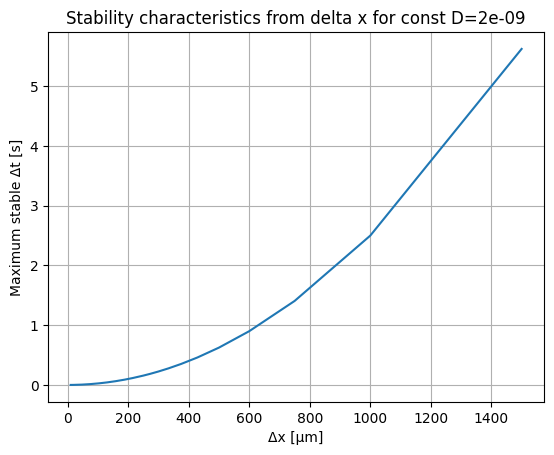

In [29]:
D = 2.0e-9
dx_list = [(mesh.dx * 10e6) for mesh.N in range (2, 300)]
stability_list = [(dx / 10e6) **2 / (2 * D) for dx in dx_list]

print(f"Stability for 50% dx: {stability_list[152]:.6f}")
print(f"Stability for 100% dx: {stability_list[-1]:.6f}")


plt.plot(dx_list, stability_list)
plt.xlabel('Δx [μm]')
plt.ylabel('Maximum stable Δt [s]')
plt.title(f'Stability characteristics from delta x for const D={D}')
plt.grid(True)
plt.show()

Since the stability characteristic of delta x is quadratic, a halving of delta x causes a fourfold decrease in the maximum delta t.

Control question #2: How should Neumann's condition be interpreted in the context of diffusion in tissue?

It means that the substance is unable to diffuse through the tissue boundary.